In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import locale

In [4]:
def rupiah(number, with_prefix=False, desimal = 2):
    locale.setlocale(locale.LC_NUMERIC, 'id_ID')
    rupiah = locale.format("%.*f", (desimal, number), True)
    if with_prefix:
        return "Rp. {}".format(rupiah)
    return rupiah

In [5]:
df = pd.read_csv('stock.csv')
df = pd.DataFrame(df)
df

,jenis_investasi,amount,avg_price
0,aapl,0.01750,2735977
1,nvda,0.00542,13861274
2,manulife,29.03800,2759
3,eastspring,59.23680,1688
4,bni_am,76.35340,1571
5,trim_a,55.81140,1791
6,manta,1.00000,43500


In [6]:
dafa = {'jenis_investasi':['bbca','tsmc'],
                    'amount':[1,0.002452],
                    'avg_price':[9850,2450212]}
df1 = pd.DataFrame(dafa)

In [7]:
dfa = pd.concat([df, df1], ignore_index=True)
dfa

,jenis_investasi,amount,avg_price
0,aapl,0.017500,2735977
1,nvda,0.005420,13861274
2,manulife,29.038000,2759
3,eastspring,59.236800,1688
4,bni_am,76.353400,1571
5,trim_a,55.811400,1791
6,manta,1.000000,43500
7,bbca,1.000000,9850
8,tsmc,0.002452,2450212


In [8]:
reksadana = df.iloc[[2,3,4,5]]
r =sum(reksadana['amount']*reksadana['avg_price'])
print(rupiah(r, True))
reksadana

Rp. 400.016,97


C:\Users\amgalenc\AppData\Local\Temp\ipykernel_7412\2129512675.py:3: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  rupiah = locale.format("%.*f", (desimal, number), True)


,jenis_investasi,amount,avg_price
2,manulife,29.0380,2759
3,eastspring,59.2368,1688
4,bni_am,76.3534,1571
5,trim_a,55.8114,1791


In [9]:
saham = df.iloc[[0,1]]
s =sum(saham['amount']*saham['avg_price'])
print(rupiah(s, True))
saham

Rp. 123.007,70


C:\Users\amgalenc\AppData\Local\Temp\ipykernel_7412\2129512675.py:3: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  rupiah = locale.format("%.*f", (desimal, number), True)


,jenis_investasi,amount,avg_price
0,aapl,0.01750,2735977
1,nvda,0.00542,13861274


In [10]:
crypto = df.iloc[[6]]
c =sum(crypto['amount']*crypto['avg_price'])
print(rupiah(c, True))
crypto

Rp. 43.500,00


C:\Users\amgalenc\AppData\Local\Temp\ipykernel_7412\2129512675.py:3: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  rupiah = locale.format("%.*f", (desimal, number), True)


,jenis_investasi,amount,avg_price
6,manta,1.0,43500


In [11]:
pta = sum(df['amount']*df['avg_price'])
total = rupiah(round(pta,2), True)
print(total)

Rp. 566.524,67


C:\Users\amgalenc\AppData\Local\Temp\ipykernel_7412\2129512675.py:3: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  rupiah = locale.format("%.*f", (desimal, number), True)


In [12]:
tickers = df['jenis_investasi'].values
size = df['amount']*df['avg_price']

C:\Users\amgalenc\AppData\Local\Temp\ipykernel_7412\2129512675.py:3: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  rupiah = locale.format("%.*f", (desimal, number), True)


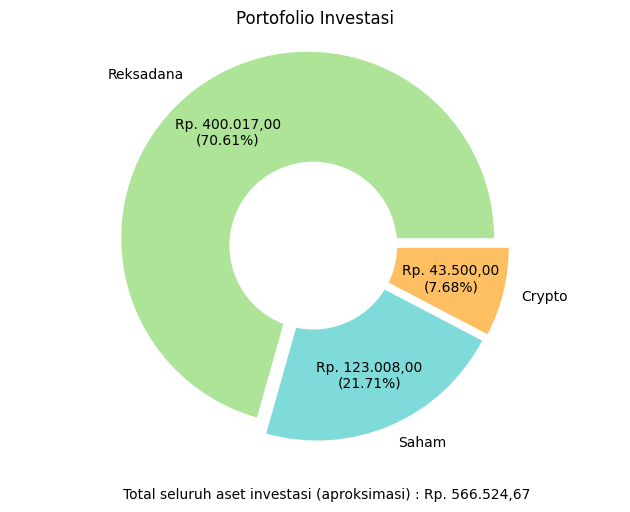

In [74]:
y = np.array([r,s,c])
labels = ['Reksadana', 'Saham', 'Crypto']
colors = ['#ADE498', '#7FDBDA', '#FEBF63']
explode = (0.05,0.05,0.05)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return "{}\n({:.2f}%)".format(rupiah(val, True),pct)
    return my_format

plt.pie(y,
        labels=labels,
        colors=colors,
        autopct=autopct_format(y), 
        pctdistance=0.71,
        explode=explode
        )    
plt.title('Portofolio Investasi')
plt.figtext(0.200,-0.05,f'Total seluruh aset investasi (aproksimasi) : {total}', fontsize=10)

centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')   
plt.tight_layout()
plt.show()